High count transposed shape: (3034, 192, 240)
Low count transposed shape: (3034, 192, 240)
Shape einzelnes High-Count-Bild: (192, 240)
Shape einzelnes Low-Count-Bild: (192, 240)


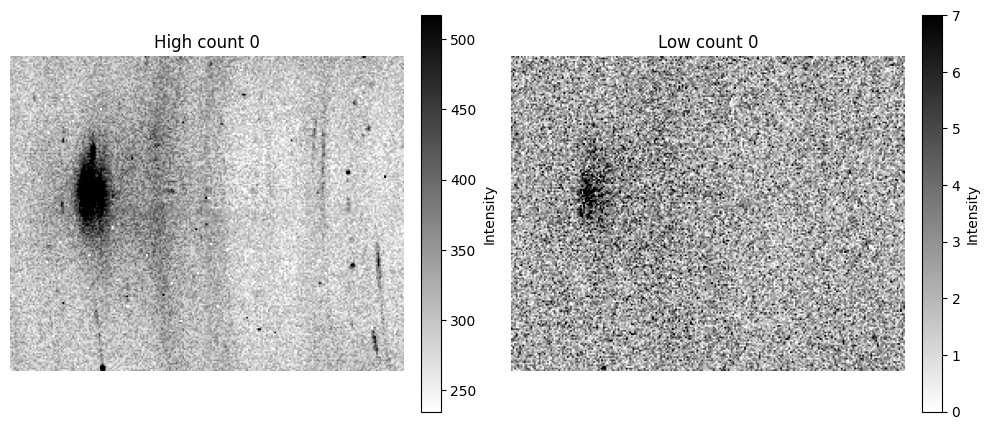

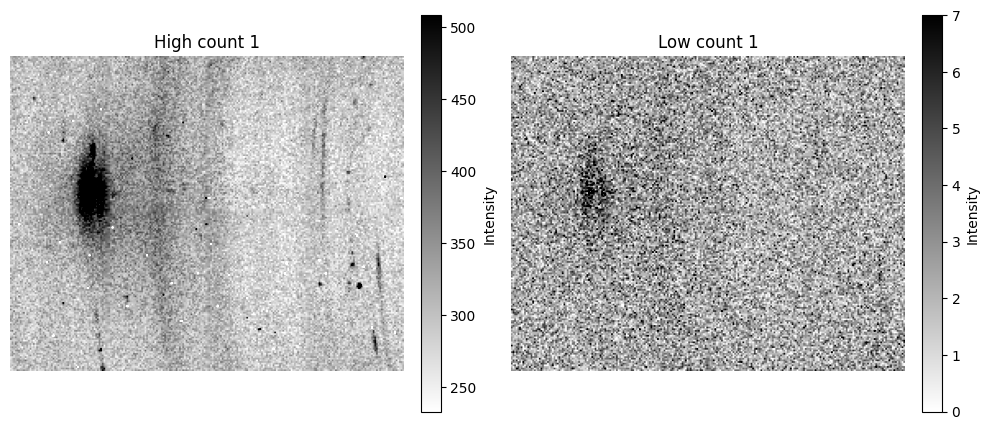

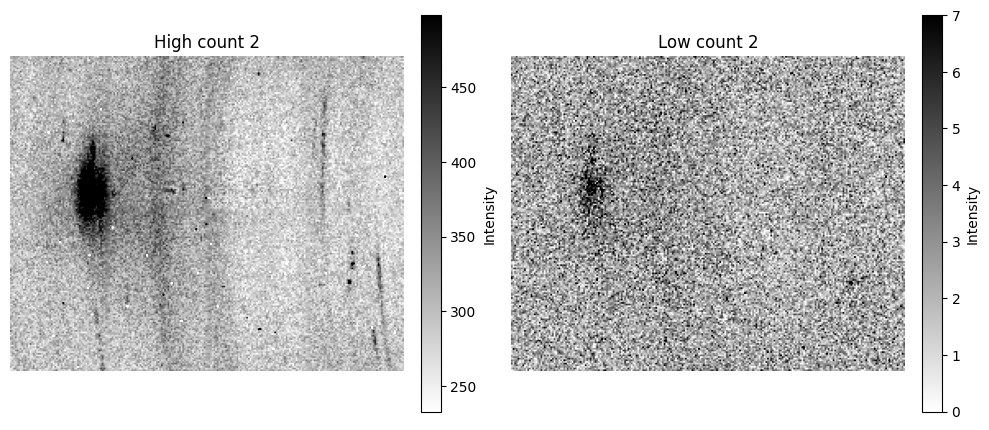

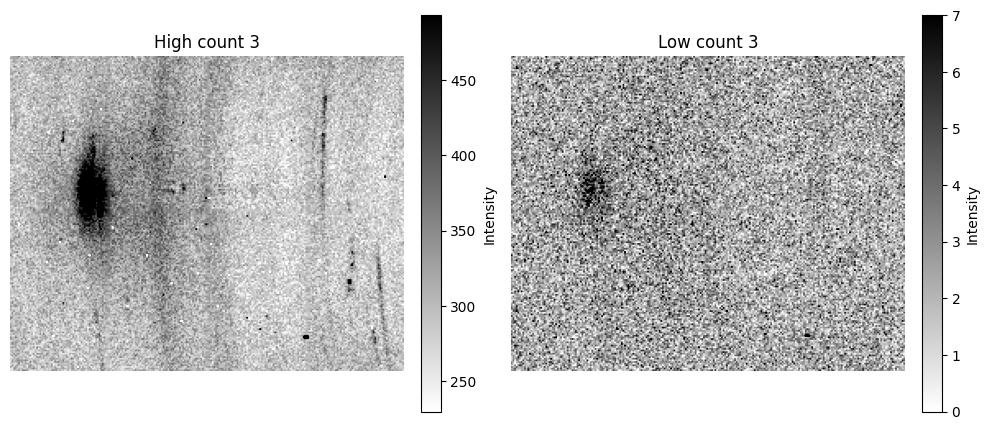

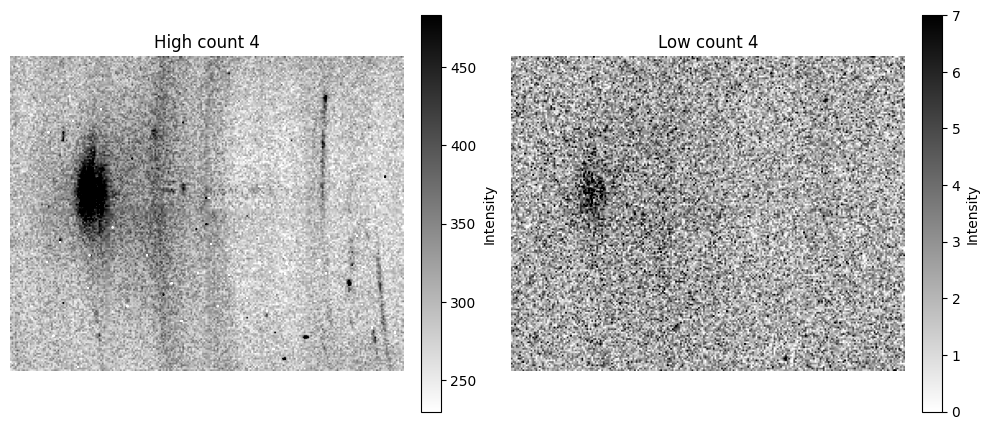

In [8]:
import h5py
import matplotlib.pyplot as plt
import numpy as np


def show_pair(high_img, low_img, idx, p_low=1, p_high=99, share_scale=False):
    def robust_minmax(img):
        vals = img.ravel()
        vmin, vmax = np.percentile(vals, (p_low, p_high))
        if not np.isfinite(vmin) or not np.isfinite(vmax) or vmax <= vmin:
            vmin, vmax = float(vals.min()), float(vals.max() + 1e-6)
        return vmin, vmax

    if share_scale:
        # Gemeinsame Skala aus beiden Bildern
        vmin_h, vmax_h = robust_minmax(high_img)
        vmin_l, vmax_l = robust_minmax(low_img)
        vmin = min(vmin_h, vmin_l)
        vmax = max(vmax_h, vmax_l)
        vmin_h = vmin_l = vmin
        vmax_h = vmax_l = vmax
    else:
        vmin_h, vmax_h = robust_minmax(high_img)
        vmin_l, vmax_l = robust_minmax(low_img)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    im0 = axes[0].imshow(high_img, cmap="gray_r", origin="lower", aspect="equal",
                         vmin=vmin_h, vmax=vmax_h)
    axes[0].set_title(f"High count {idx}")
    axes[0].axis("off")
    cbar0 = fig.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)
    cbar0.set_label("Intensity")

    im1 = axes[1].imshow(low_img, cmap="gray_r", origin="lower", aspect="equal",
                         vmin=vmin_l, vmax=vmax_l)
    axes[1].set_title(f"Low count {idx}")
    axes[1].axis("off")
    cbar1 = fig.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)
    cbar1.set_label("Intensity")

    plt.tight_layout()
    plt.show()



file_path = "test_data.hdf5"

with h5py.File(file_path, "r") as f:
    high_data = f["/high_count/data"][:]   # (192, 240, 3034)
    low_data = f["/low_count/data"][:]     # (192, 240, 3034)

# Invert such that Matlab formatting is converted to python formatting
high_data = high_data.transpose(2, 0, 1)   # (3034, 192, 240)
low_data = low_data.transpose(2, 0, 1)     # (3034, 192, 240)

print("High count transposed shape:", high_data.shape)
print("Low count transposed shape:", low_data.shape)

# Picture shapes
high_img = high_data[0]
low_img = low_data[0]
print("Shape einzelnes High-Count-Bild:", high_img.shape)
print("Shape einzelnes Low-Count-Bild:", low_img.shape)

# Pictures as matrices
"""
print("High count sample 0 (Matrix):")
print(high_img)
print("\nLow count sample 0 (Matrix):")
print(low_img)
"""

# Choosing Pairs to show
for i in range(0, 5):
    show_pair(high_data[i], low_data[i], i)
